In [1]:
import os
import yaml
from collections import defaultdict
import matplotlib.pyplot as plt


In [2]:
def count_images(data_path):
    """Count the number of images for each class in the given dataset path."""
    class_counts = defaultdict(int)
    for root, _, files in os.walk(data_path):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r') as f:
                    for line in f:
                        class_id = int(line.split()[0])
                        class_counts[class_id] += 1
    return class_counts


In [3]:
# Load the dataset configuration
with open('/home/ian/intellicook/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11/data.yaml', 'r') as f:
    data_config = yaml.safe_load(f)

# Get the base path for the dataset
base_path = os.path.dirname('/home/ian/intellicook/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11/data.yaml')

# Get the paths for train, validation, and test datasets
train_path = os.path.abspath('/home/ian/intellicook/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11/train')
val_path = os.path.abspath('/home/ian/intellicook/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11/valid')
test_path = os.path.abspath('/home/ian/intellicook/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11/test')

print("train_path: ", train_path)

# Count the images for each class in train, validation, and test datasets
train_counts = count_images(train_path)
val_counts = count_images(val_path)
test_counts = count_images(test_path)

# Get the class names
class_names = data_config['names']

# Print the distribution
print("Class Distribution:")

print(f'{"Class":<20} {"Train":<10} {"Validation":<10} {"Test":<10}')
for class_id, class_name in enumerate(class_names):
    train_count = train_counts.get(class_id, 0)
    val_count = val_counts.get(class_id, 0)
    test_count = test_counts.get(class_id, 0)
    print(f'{class_name:<20} {train_count:<10} {val_count:<10} {test_count:<10}')


train_path:  /home/ian/intellicook/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11/train
Class Distribution:
Class                Train      Validation Test      
'                    26         0          0         
-                    118        0          0         
apple                1729       20         30        
asparagus            1192       47         14        
avocado              1895       49         22        
banana               996        25         33        
bell pepper          1585       59         71        
bitter gourd         1312       33         12        
bok choy             1498       49         31        
broccoli             1718       27         52        
cabbage              857        19         7         
carrot               1772       39         47        
cashew               2907       94         68        
cauliflower          779        17         9         
chayote              1493       51         21        
c

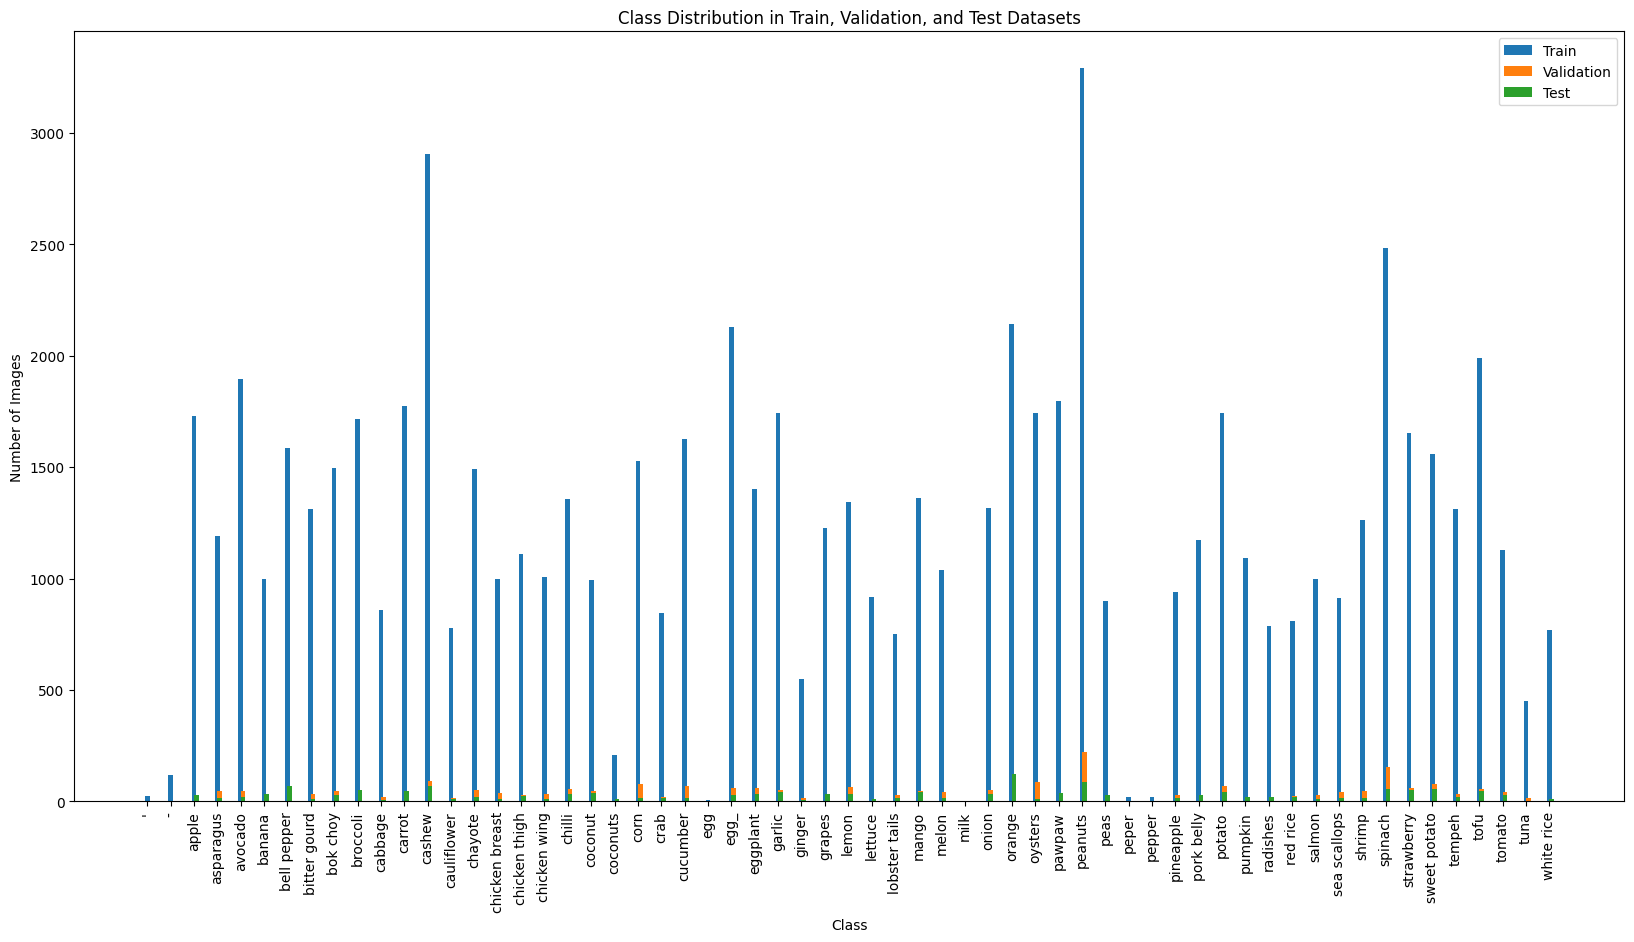

In [4]:
# Plot the distribution
labels = class_names
train_values = [train_counts.get(i, 0) for i in range(len(class_names))]
val_values = [val_counts.get(i, 0) for i in range(len(class_names))]
test_values = [test_counts.get(i, 0) for i in range(len(class_names))]

x = range(len(labels))

plt.figure(figsize=(20, 10))
plt.bar(x, train_values, width=0.2, label='Train', align='center')
plt.bar(x, val_values, width=0.2, label='Validation', align='edge')
plt.bar(x, test_values, width=0.2, label='Test', align='edge')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Train, Validation, and Test Datasets')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.show()


In [6]:
# Calculate the total number of images in each dataset
total_train = sum(train_values)
total_val = sum(val_values)
total_test = sum(test_values)

# Calculate the ratios
total = total_train + total_val + total_test
train_ratio = total_train / total
val_ratio = total_val / total
test_ratio = total_test / total

# Print the ratios
print(f'Train Ratio: {train_ratio:.2f}')
print(f'Validation Ratio: {val_ratio:.2f}')
print(f'Test Ratio: {test_ratio:.2f}')

Train Ratio: 0.95
Validation Ratio: 0.03
Test Ratio: 0.02
